対応のない t 検定

In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [43]:
# サンプルデータ iris.csv の読み込み
df = pd.read_csv('https://raw.githubusercontent.com/koichi-inoue/DataScience/main/iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [44]:
# Versicolor種の sepal.width（がくの幅）を df1 に抽出します
df1 = df.query( ' variety == "Versicolor" ')['sepal.width']
df1.describe()

count    50.000000
mean      2.770000
std       0.313798
min       2.000000
25%       2.525000
50%       2.800000
75%       3.000000
max       3.400000
Name: sepal.width, dtype: float64

In [45]:
# Virginica種の sepal.width（がくの幅）を df2 に抽出します
df2 = df.query( ' variety == "Virginica" ')['sepal.width']
df2.describe()

count    50.000000
mean      2.974000
std       0.322497
min       2.200000
25%       2.800000
50%       3.000000
75%       3.175000
max       3.800000
Name: sepal.width, dtype: float64

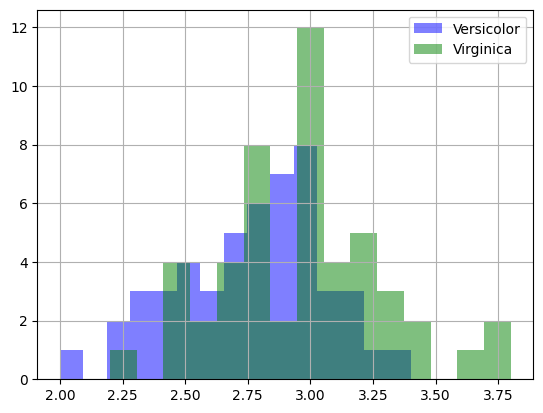

In [46]:
df1.hist( bins= 15, color="blue", alpha=0.5, label=f"Versicolor" )
df2.hist( bins= 15, color="green", alpha=0.5, label=f"Virginica" )
plt.legend()

In [47]:
d1 = df1.values
print(type(d1))
print(d1)

<class 'numpy.ndarray'>
[3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7
 2.2 2.5 3.2 2.8 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4
 3.1 2.3 3.  2.5 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8]


In [48]:
d2 = df2.values
print(type(d2))
print(d2)

<class 'numpy.ndarray'>
[3.3 2.7 3.  2.9 3.  3.  2.5 2.9 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8
 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.
 3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2 3.3 3.  2.5 3.  3.4 3. ]


In [49]:
# 対応のないt検定：ttest_ind()
t, p = stats.ttest_ind(d1, d2, equal_var=True, alternative='two-sided')

print(f'p値 = {p:.5f}')
print(f't値 = {t:.3f}')

p値 = 0.00182
t値 = -3.206


対応のある t 検定

In [50]:
# サンプルデータ sleep.csv の読み込み
df = pd.read_csv('https://raw.githubusercontent.com/koichi-inoue/DataScience/main/sleep.csv')
df

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5
5,6,3.4,1,6
6,7,3.7,1,7
7,8,0.8,1,8
8,9,0.0,1,9
9,10,2.0,1,10


In [51]:
# group = 1 の extra（差分値）を df1 に抽出します
df1 = df.query( ' group == 1 ')['extra']
df1

0    0.7
1   -1.6
2   -0.2
3   -1.2
4   -0.1
5    3.4
6    3.7
7    0.8
8    0.0
9    2.0
Name: extra, dtype: float64

In [52]:
# group = 2 の extra（差分値）を df2 に抽出します
df2 = df.query( ' group == 2 ')['extra']
df2

10    1.9
11    0.8
12    1.1
13    0.1
14   -0.1
15    4.4
16    5.5
17    1.6
18    4.6
19    3.4
Name: extra, dtype: float64

<Axes: title={'center': 'extra'}, xlabel='group'>

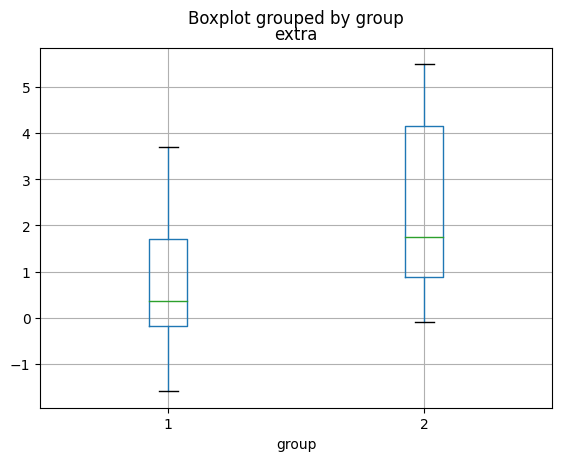

In [53]:
df.boxplot( column='extra' , by='group' )

In [54]:
d1 = df1.values
print(type(d1))
print(d1)

<class 'numpy.ndarray'>
[ 0.7 -1.6 -0.2 -1.2 -0.1  3.4  3.7  0.8  0.   2. ]


In [55]:
d2 = df2.values
print(type(d2))
print(d2)

<class 'numpy.ndarray'>
[ 1.9  0.8  1.1  0.1 -0.1  4.4  5.5  1.6  4.6  3.4]


In [56]:
# 対応のある検定：ttest_rel()
t, p = stats.ttest_rel(d1, d2)

print(f'p値 = {p:.3f}')
print(f't値 = {t:.2f}')

p値 = 0.003
t値 = -4.06
